In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
pip install neattext

Note: you may need to restart the kernel to use updated packages.


In [3]:
#load text cleaning packages
import neattext.functions as nfx

In [4]:
#estimators 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

#transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [5]:
#load Dataset
df=pd.read_excel('hotel_reviews.xlsx')
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [6]:
#value counts
df['Rating'].value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

<AxesSubplot:xlabel='Rating', ylabel='count'>

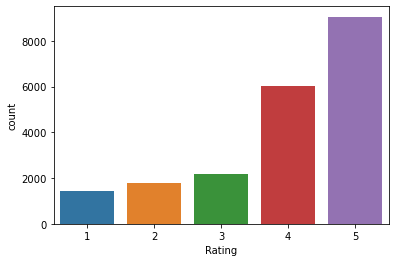

In [7]:
#plot
sns.countplot(x='Rating',data=df)

In [8]:
#data cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [9]:
#user handles
df['clean_text']=df['Review'].apply(nfx.remove_userhandles)

In [10]:
#stopwords
df['clean_text']=df['Review'].apply(nfx.remove_stopwords)

In [12]:
#special characters
df['clean_text']=df['Review'].apply(nfx.remove_special_characters)

In [13]:
df.head()

,Review,Rating,clean_text
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms not 4 experience hotel monaco seatt...
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay went seahawk game awesom...


In [15]:
#feature Extraction
Xfeatures=df['clean_text']
ylabels=df['Rating']

In [17]:
#split
x_train,x_test,y_train,y_test=train_test_split(Xfeatures,ylabels,test_size=0.2,random_state=0)

In [18]:
#build pipeline
from sklearn.pipeline import Pipeline


In [20]:
#logistic Regression pipeline
pipe_lr=Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [21]:
#train and fit data
pipe_lr.fit(x_train,y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [22]:
#check Accuracy
pipe_lr.score(x_test,y_test)

0.5798975359843864

In [23]:
#make a prediction
exl='this hotel is worst'

In [24]:
pipe_lr.predict([exl])

array([1], dtype=int64)

In [25]:
#prediction prob
pipe_lr.predict_proba([exl])

array([[0.79527179, 0.11088727, 0.05244932, 0.02608317, 0.01530845]])

In [26]:
#to know the classes
pipe_lr.classes_

array([1, 2, 3, 4, 5], dtype=int64)

In [28]:
#save model and pipeline
import joblib
pipeline_file=open('hotel_review_classification_19-01-2023.pkl','wb')
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()